<a href="https://colab.research.google.com/github/greengoosepumpkin/IBM-Project-Directory/blob/main/Current__12lead_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load in and snip data

In [10]:
#install and import libraries

!pip install wfdb
!pip install biosppy

import os
import wfdb as wf
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io 
from scipy.io import loadmat
from scipy import signal
from biosppy.signals import ecg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#clone repository holding data into colab

!git clone https://github.com/abigail-mcdonald/ecg_project.git

!ls

fatal: destination path 'ecg_project' already exists and is not an empty directory.
ecg_project  sample_data


In [12]:
#point to files

path = "/content/ecg_project/data"
files = os.listdir(path)

In [13]:
#create a list of record names
ecg_data = []
for file in files:
    if file.endswith(".mat"):
        record = file[0:-4]   #drop tag
        ecg_data.append(record)

In [14]:
#class of functions to find a 10 sec segment of ecg, courtesy of https://www.kaggle.com/code/nelsonsharma/ecg-02-ecg-signal-pre-processing/notebook#ECG-Pre-Processing

#global variables
g_DATA = '.mat'
g_HEAD = '.hea'
g_leads = ['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6' ]
BASIC_SRATE = 500 #Hz

class ecg_segment:
    # represent a 10 sec signal of ecg from 12 leads
    
    def __init__(self, seg_name):
        self.name = seg_name
        self.file_mat = os.path.join(path,self.name+'.mat')
        self.file_hea = os.path.join(path,self.name+'.hea')
        self.load_data()
        self.load_header()
        
        
    def load_data(self):
        self.signals=loadmat(self.file_mat)['val'].astype(np.float64)
        self.signald = {}
        for i in range(0,len(g_leads)):
            self.signald[g_leads[i]] = self.signals[i,:]
        # an array of shape (12, 5000) each row is a lead in g_leads
        return
    
    def load_header(self):
        with open(self.file_hea,'r') as f:
            hlines=f.readlines() # each line ends with newline char
            #JS34506 12 500 5000 28-Mar-2021 04:58:01  
            #0    (6x1) < from row0 extract everything
            tl = (hlines[0][0:-1]).split(" ")
            assert (tl[0] == self.name)
            assert (tl[1] == '12')
            assert (tl[2] == '500')
            assert (tl[3] == '5000')
            #self.timestamp = datetime.datetime.strptime("%d-%b-%Y_%H:%M:%S", tl[4]+'_'+tl[5])
            for i in range(1,12):
                assert ((hlines[i][0:-1]).split(" ")[8] == g_leads[i-1])
                assert ((hlines[i][0:-1]).split(" ")[8] == g_leads[i-1])
                
            self.age = int(hlines[13][0:-1].split(" ")[1])
            self.gender = hlines[14][0:-1].split(" ")[1]
            self.Dx = (hlines[15][0:-1].split(" ")[1])
            self.Rx = (hlines[16][0:-1].split(" ")[1])
            self.Hx = (hlines[17][0:-1].split(" ")[1])
            self.Sx = (hlines[18][0:-1].split(" ")[1])
            
        return 
    
    def info(self):
        print(self.name,self.gender,self.age)
        return

In [15]:
#code to call a random record from files

random = np.random.choice(ecg_data, size=1)[0]  
sa_ecg = ecg_segment(random)
sa_ecg.info()

JS00020 Female 70


##Visualize a sample record

In [16]:
!pip install ecg_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import ecg_plot

signal_data = []
for file in files:
    if file.endswith(".mat"):
        #mat = scipy.io.loadmat(os.path.join(path, file))
        signal_data.append(mat)

In [47]:
sig_ran = np.random.choice(signal_data, size=1)

sig_ran

array([{'val': array([[ 54,  59,  59, ..., -20,  15,  59],
              [  5, -15, -20, ..., -59, -15,  20],
              [-49, -73, -78, ..., -39, -29, -39],
              ...,
              [166, 132, 127, ...,  29,  15,  15],
              [ 63,  39,  44, ..., -10, -20, -20],
              [ 20, -15, -10, ..., -10, -20, -20]], dtype=int16)}],
      dtype=object)

TypeError: ignored

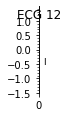

In [48]:
ecg_plot.plot(sig_ran, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()

Next Steps:

Signal filtering: Remove high-frequency noise from the signals using digital filters.

Baseline wander correction: Correct for baseline wander, which is a slow drift in the ECG signal baseline caused by muscle contractions and breathing.

R-peak detection: Detect the R-peak of each QRS complex, which is the highest point in the QRS complex and marks the beginning of ventricular depolarization.

ECG segmentation: Segment the ECG signals into different morphological components, such as the P-wave, QRS complex, and T-wave.

Feature extraction: Extract relevant features from the ECG signals, such as the mean, standard deviation, and heart rate variability.

Data normalization: Normalize the ECG signals so that they have a mean of zero and a standard deviation of one.